# Deep Neural Network for Image Classification: Application
# Final Project Deep Learning
# Roberto Pérez A01380452
# Guillermo Astiazarán. A00226365

In this notebook we will show the tweaks and modifications we made to the original 4 layer neural network given to us as a cat vs non cat image classification neural network 

## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [9]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Dataset  “Happy House Dataset”

Source : https://www.kaggle.com/iarunava/happy-house-dataset/

For this project we decide to use the  “Happy House Dataset”. In this dataset we have 600 images,some of those perons smiling and some other with diffent facial expressions. The final goal is to clasify them with the best possible accuracy.


Let's get more familiar with the dataset. Load the data by running the cell below.

In [10]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 0
The person is NOT smiling


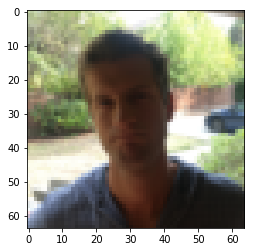

In [11]:
# Example of a picture
index = 10 # 24 for an exampe of a smiling person picture
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]))
if(classes[train_y[0,index]] == 0):
    print("The person is NOT smiling")
else:
    print("The person IS smiling")
    

In [12]:
# Explore our dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 600
Number of testing examples: 150
Each image is of size: (64, 64, 3)
train_x_orig shape: (600, 64, 64, 3)
train_y shape: (1, 600)
test_x_orig shape: (150, 64, 64, 3)
test_y shape: (1, 150)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/Captura1.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [13]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 600)
test_x's shape: (12288, 150)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 3 - Architecture of our model

Now that you are familiar with our dataset, it is time to build a deep neural network to distinguish smiling persons vs non smiling persons!

### 3.1 - 4-layer deep neural network

It is hard to represent an L-layer deep neural network however, here is a simplified network representation:

<img src="images/Captura2.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.2 - General methodology

As usual we will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!
Let's now implement those two models!

## 4 -  Our  4-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [14]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [16]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule. We use the original.
    num_iterations -- number of iterations of the optimization loop. Tweaked with 2700
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Nice! now lets train the model as a 4-layer neural network. 

Please run the cell below to train our model. The cost should decrease on every iteration. It may take up to 5 minutes to run the 2700 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.720910
Cost after iteration 100: 0.587341
Cost after iteration 200: 0.511134
Cost after iteration 300: 0.457896
Cost after iteration 400: 0.400692
Cost after iteration 500: 0.359060
Cost after iteration 600: 0.324701
Cost after iteration 700: 0.294960
Cost after iteration 800: 0.287764
Cost after iteration 900: 0.253641
Cost after iteration 1000: 0.237898
Cost after iteration 1100: 0.217896
Cost after iteration 1200: 0.207535
Cost after iteration 1300: 0.187096
Cost after iteration 1400: 0.170541
Cost after iteration 1500: 0.172992
Cost after iteration 1600: 0.155506
Cost after iteration 1700: 0.142432
Cost after iteration 1800: 0.135146
Cost after iteration 1900: 0.128466
Cost after iteration 2000: 0.121934
Cost after iteration 2100: 0.114674
Cost after iteration 2200: 0.109706
Cost after iteration 2300: 0.104478
Cost after iteration 2400: 0.099769
Cost after iteration 2500: 0.094489
Cost after iteration 2600: 0.090863


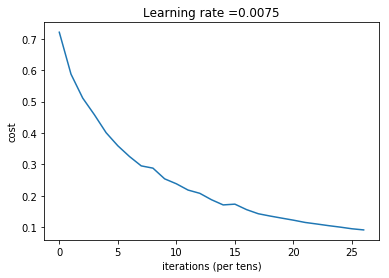

In [8]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2700, print_cost = True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.720910 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.587341 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2600**</td>
        <td> 0.090863 </td>
    </tr>
</table>

In [17]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9933333333333334


<table>
    <tr>
    <td>
    **Train Accuracy**
    </td>
    <td>
    0.9933333333333334
    </td>
    </tr>
</table>

In [18]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9733333333333335


**Expected Output**:

<table> 
    <tr>
        <td> **Test Accuracy**</td>
        <td> 0.9733333333333335 </td>
    </tr>
</table>

Cool! It seems that our 4-layer neural network has a really good performance (97%), even just a little bit better than our 2-layer neural network (96%) on the same test set. (We didnt include the 2- layer here but in the documentation you can see the perfomrance to corroborate our results.)

Ww think this is good performance for this task. 

##  6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

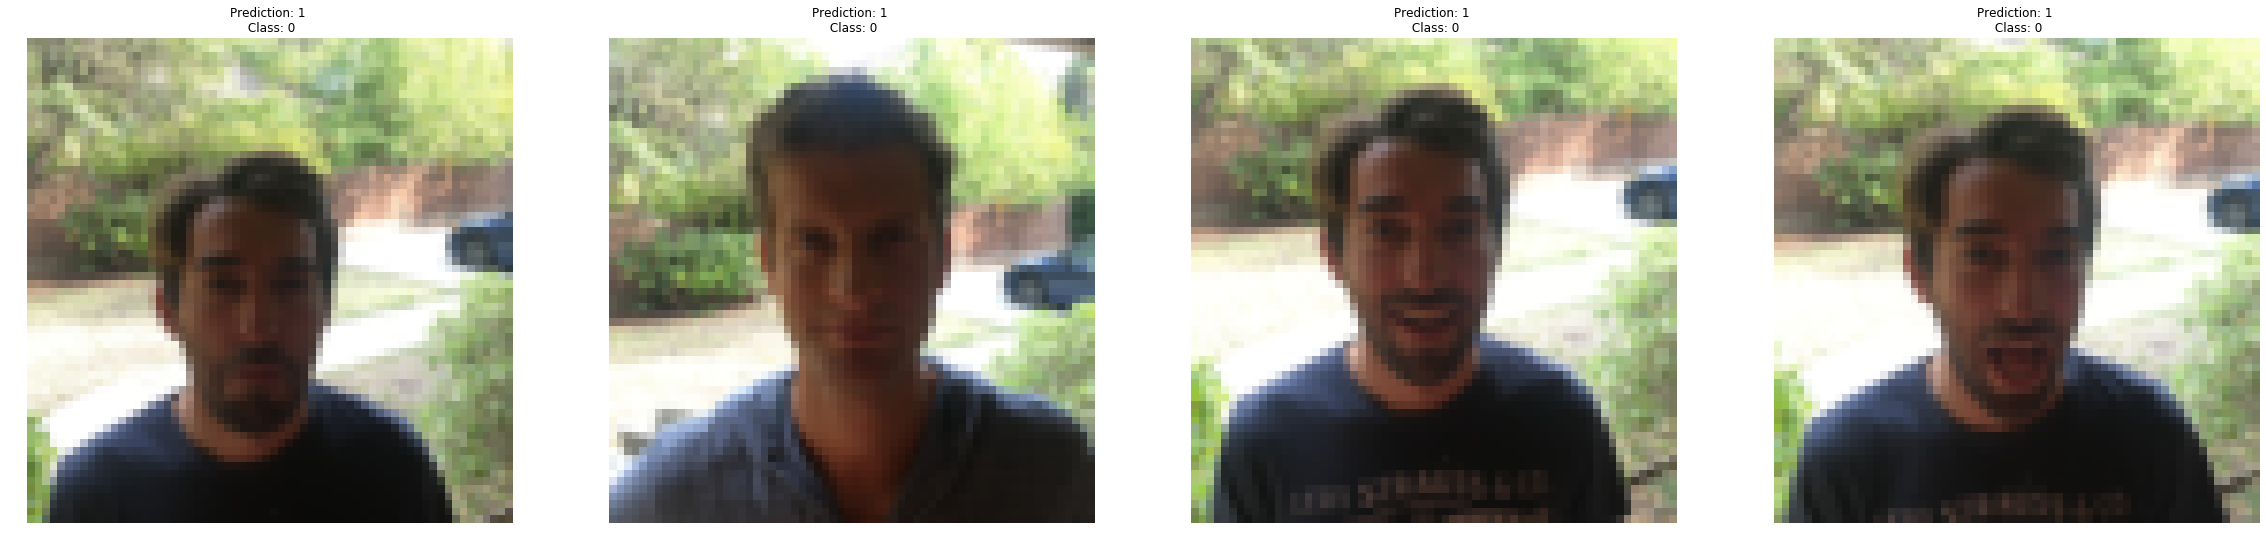

In [19]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**A few types of images the model tends to do poorly on include:** 
- The face of the person is in a unusual position
- Unusal facial expression (not smiling but also not very serious neither)
- Camera Angle
- Brightness of the picture

**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython